In [12]:
import numpy as np
import time
import tracemalloc
import matplotlib.pyplot as plt

In [13]:
arrays = [
    ("10 Integers", np.random.randint(0, 100, size=10)),
    ("10 Floats", np.random.uniform(0.1, 99.9, size=10)),
    ("100 Integers", np.random.randint(0, 100, size=100)),
    ("100 Floats", np.random.uniform(0.1, 99.9, size=100)),
    ("1000 Integers", np.random.randint(0, 100, size=1000)),
    ("1000 Floats", np.random.uniform(0.1, 99.9, size=1000)),
    ("10000 Integers", np.random.randint(0, 100, size=10000)),
    ("10000 Floats", np.random.uniform(0.1, 99.9, size=10000))
]

In [14]:
def reverse_array(arr):
    if(len(arr) == 1):
        return arr
    reversed_array = []
    for i in range(len(arr) -1,-1,-1):
        reversed_array.append(arr[i])
    return reversed_array

In [15]:
def bubble_sort(arr):
    for i in range(len(arr)):
        for j in range(0, len(arr)-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

In [16]:
def insertion_sort(arr):
     for step in range(1, len(arr)):
         key = arr[step]
         j = step - 1
         while j >= 0 and key < arr[j]:
             arr[j + 1] = arr[j]
             j = j - 1
         arr[j + 1] = key
     return arr

In [17]:
def reverse_array(arr):
    if(len(arr) == 1):
        return arr
    reversed_array = []
    for i in range(len(arr) -1,-1,-1):
        reversed_array.append(arr[i])
    return reversed_array

In [18]:
def quick_sort(arr):
    if len(arr) <= 1:
        return arr

    pivot = arr[len(arr) // 2]  
    less_than_pivot = [x for x in arr if x < pivot] 
    equal_to_pivot = [x for x in arr if x == pivot]  
    greater_than_pivot = [x for x in arr if x > pivot]  

    return quick_sort(less_than_pivot) + equal_to_pivot + quick_sort(greater_than_pivot)

In [19]:
def binary_search(arr, target):
    low = 0
    high = len(arr) - 1

    while low <= high:
        mid = (low + high) // 2
        mid_val = arr[mid]

        if mid_val == target:
            return mid
        elif mid_val < target:
            low = mid + 1
        else:
            high = mid - 1

    return -1

In [20]:
def measure_algorithm(algorithm, array):
    start_time = time.time()
    tracemalloc.start()
    if algorithm == binary_search:
        algorithm(array, array[0])
    else:
        algorithm(array)
    end_time = time.time()
    time_of_execution = end_time - start_time
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    return time_of_execution, peak

In [21]:
def plot_results(algorithm_name, time_results, memory_results):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(len(arrays)), time_results, marker='o', linestyle='-')
    plt.xticks(range(len(arrays)), [array[0] for array in arrays], rotation=45)
    plt.xlabel('Array Size')
    plt.ylabel('Time (s)')
    plt.title(f'Time Complexity of {algorithm_name}')

    plt.subplot(1, 2, 2)
    plt.plot(range(len(arrays)), memory_results, marker='o', linestyle='-')
    plt.xticks(range(len(arrays)), [array[0] for array in arrays], rotation=45)
    plt.xlabel('Array Size')
    plt.ylabel('Memory Usage (bytes)')
    plt.title(f'Memory Complexity of {algorithm_name}')

    plt.tight_layout()
    plt.show()

algorithm_functions = [reverse_array, bubble_sort, insertion_sort, quick_sort, binary_search]
algorithm_names = ['Reverse Array', 'Bubble Sort', 'Insertion Sort', 'Quick Sort', 'Binary Search']

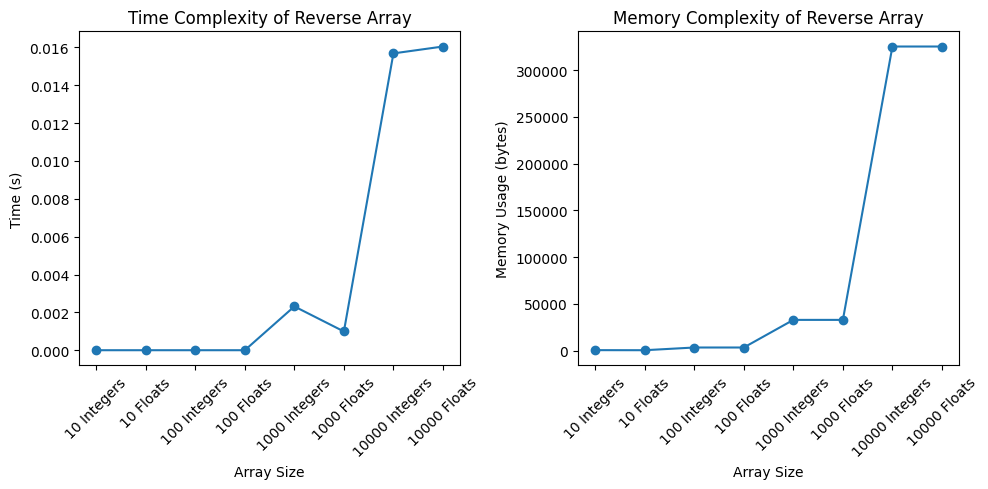

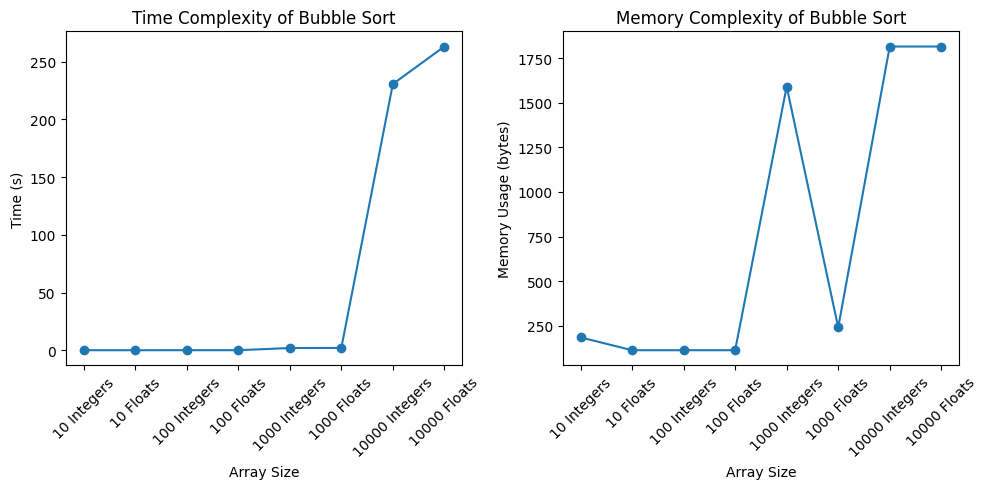

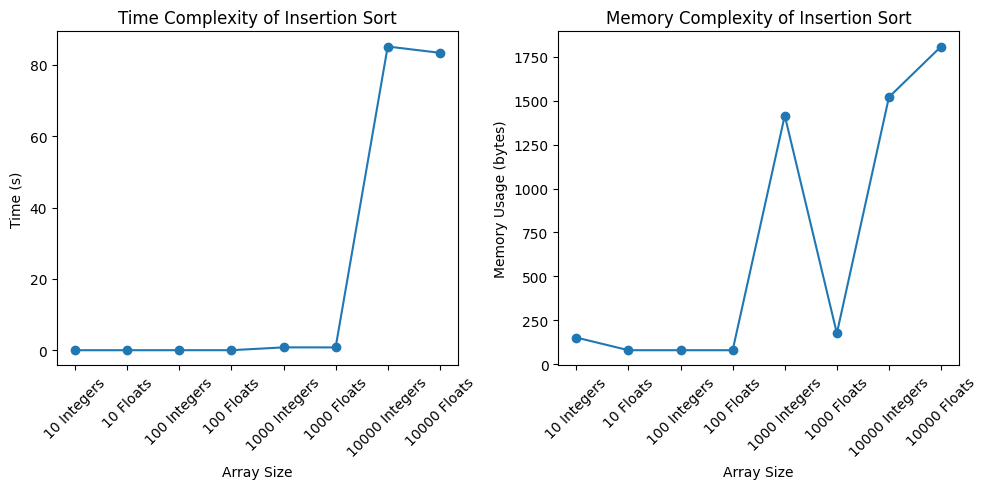

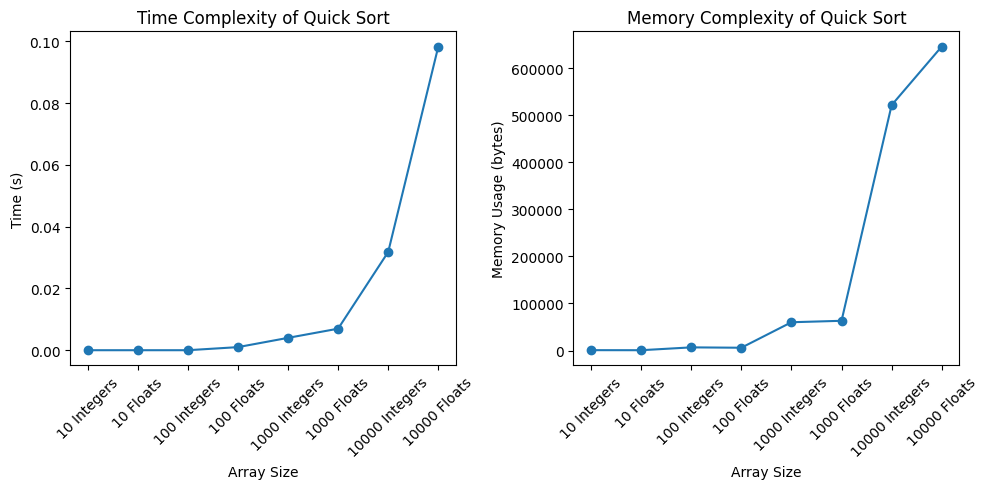

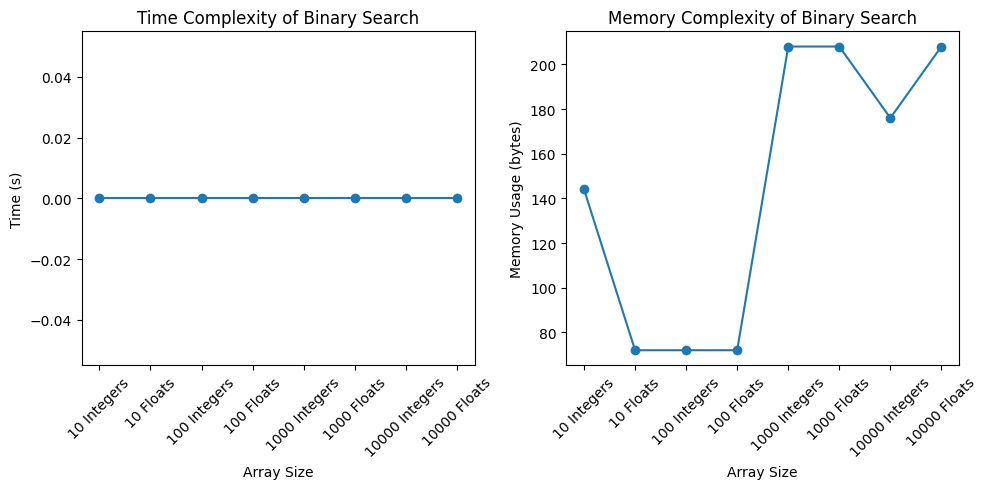

In [22]:
for algorithm, algorithm_name in zip(algorithm_functions, algorithm_names):
    time_results = []
    memory_results = []
    for array_name, array in arrays:
        execution_time, memory_usage = measure_algorithm(algorithm, array.copy())
        time_results.append(execution_time)
        memory_results.append(memory_usage)
    plot_results(algorithm_name, time_results, memory_results)